In [1]:
import yfinance as yf
import pandas as pd

# Define the stock symbols
stocks = ['XOM']

# Fetch the stock data for the last 5 years (from October 15, 2019)
start_date = '2019-10-15'
end_date = '2024-10-15'

# Download historical market data
data = yf.download(stocks, start=start_date, end=end_date)

# Export to CSV
data.to_csv('exxon_stock_prices_5_years.csv')

# Display the data
print(data)


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-15   69.059998   70.000000   69.010002   69.419998   53.820831   
2019-10-16   69.209999   69.529999   68.209999   68.230003   52.898239   
2019-10-17   68.480003   68.879997   68.080002   68.139999   52.828449   
2019-10-18   67.870003   68.150002   67.610001   67.610001   52.417545   
2019-10-21   67.820000   68.769997   67.820000   68.739998   53.293625   
...                ...         ...         ...         ...         ...   
2024-10-08  123.879997  124.019997  121.260002  122.040001  121.045357   
2024-10-09  120.900002  122.580002  120.800003  122.089996  121.094940   
2024-10-10  123.160004  123.699997  122.290001  123.139999  122.136391   
2024-10-11  123.099998  124.029999  122.940002  123.610001  122.602562   
2024-10-14  123.239998  124.260002  122.620003  124.080002  123.068733   

              Volume  
Date          

In [2]:
import matplotlib.pyplot as plt

# Review overall structure
data_shape = data.shape
print("Data Shape (Rows, Columns):", data_shape)

# Check for missing or null values using .isnull().sum()
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)



Data Shape (Rows, Columns): (1258, 6)

Missing Values in Each Column:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


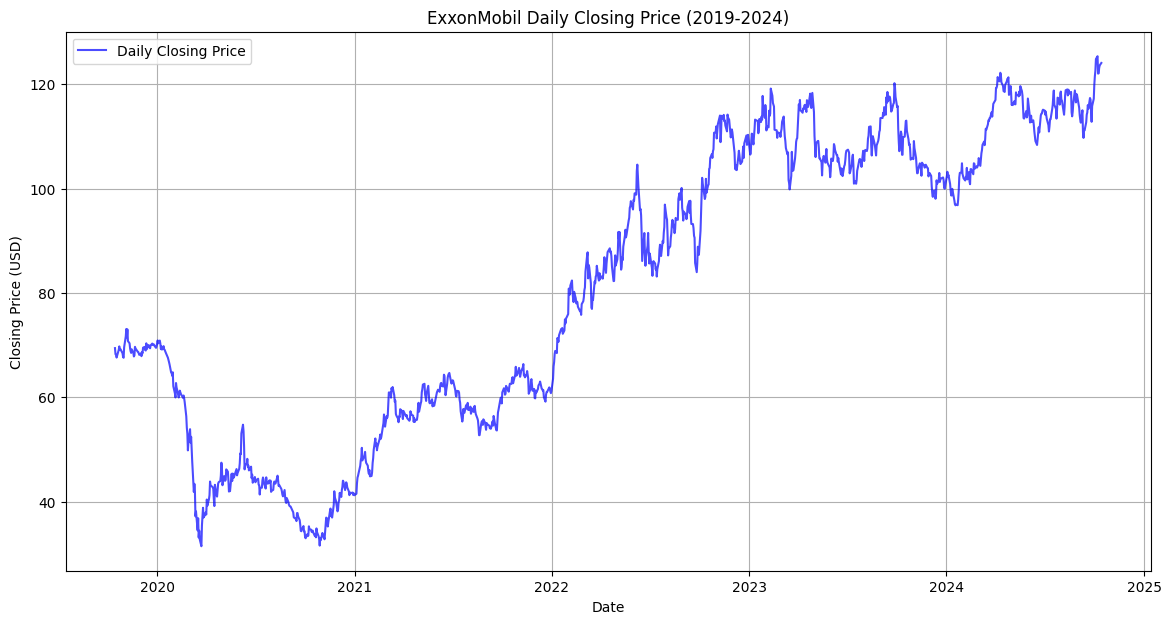

In [3]:
# Create the plot for daily closing prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Daily Closing Price', color='blue', alpha=0.7)

# Adding titles and labels
plt.title('ExxonMobil Daily Closing Price (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()




Yearly Summary (Average, Median, and Std of Closing Price):
    Year        mean      median        std
0  2019   69.333333   69.240002   1.163235
1  2020   44.524941   42.730000   9.598223
2  2021   57.963651   58.830000   5.017095
3  2022   91.652032   90.650002  11.649295
4  2023  108.616680  107.779999   5.143144
5  2024  112.822626  114.514999   6.797071


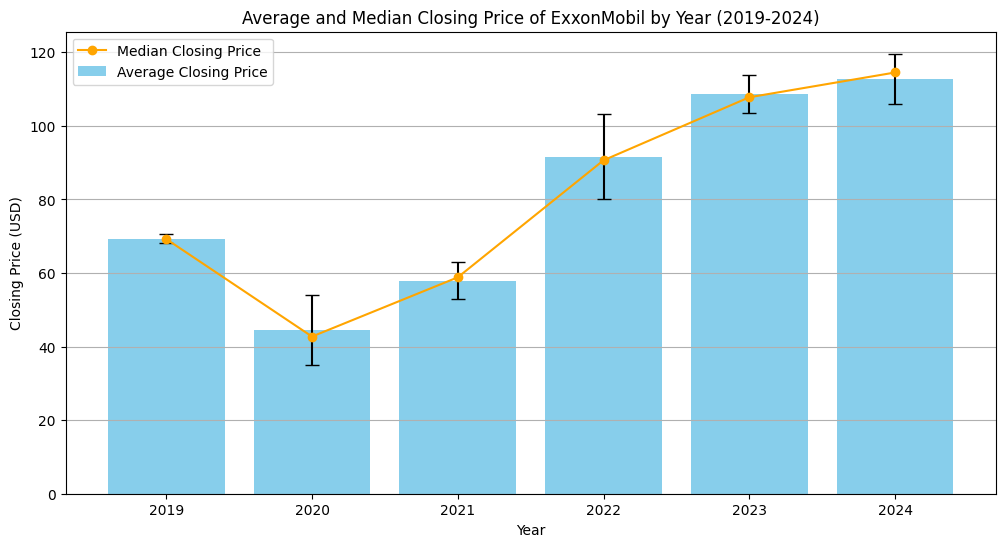

In [4]:
# Add a 'Year' column to the DataFrame
data['Year'] = data.index.year

# Group by 'Year' and calculate the average, median, and standard deviation of the closing price
yearly_summary = data.groupby('Year')['Close'].agg(['mean', 'median', 'std']).reset_index()

print("\nYearly Summary (Average, Median, and Std of Closing Price):\n", yearly_summary)

# Create the plot: Yearly average and median closing price
plt.figure(figsize=(12, 6))
plt.bar(yearly_summary['Year'], yearly_summary['mean'], yerr=yearly_summary['std'], capsize=5, color='skyblue', label='Average Closing Price')
plt.plot(yearly_summary['Year'], yearly_summary['median'], marker='o', color='orange', label='Median Closing Price')
plt.title('Average and Median Closing Price of ExxonMobil by Year (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')
plt.xticks(yearly_summary['Year'])  # Set x-ticks to the years
plt.legend()
plt.grid(axis='y')
plt.show()

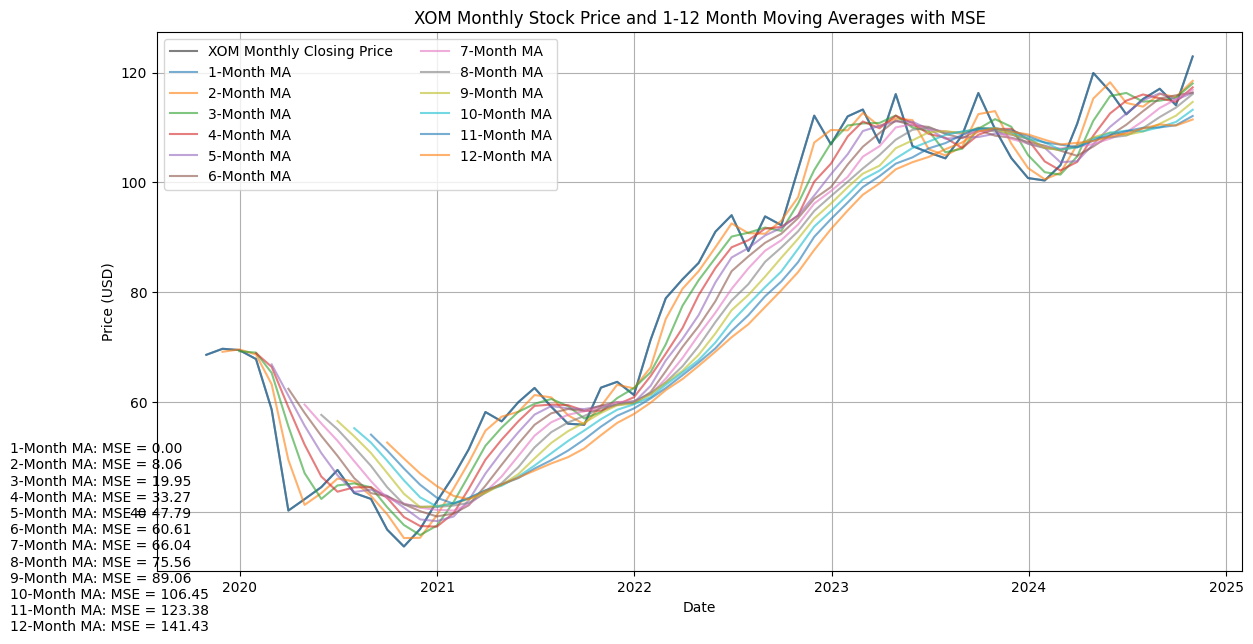

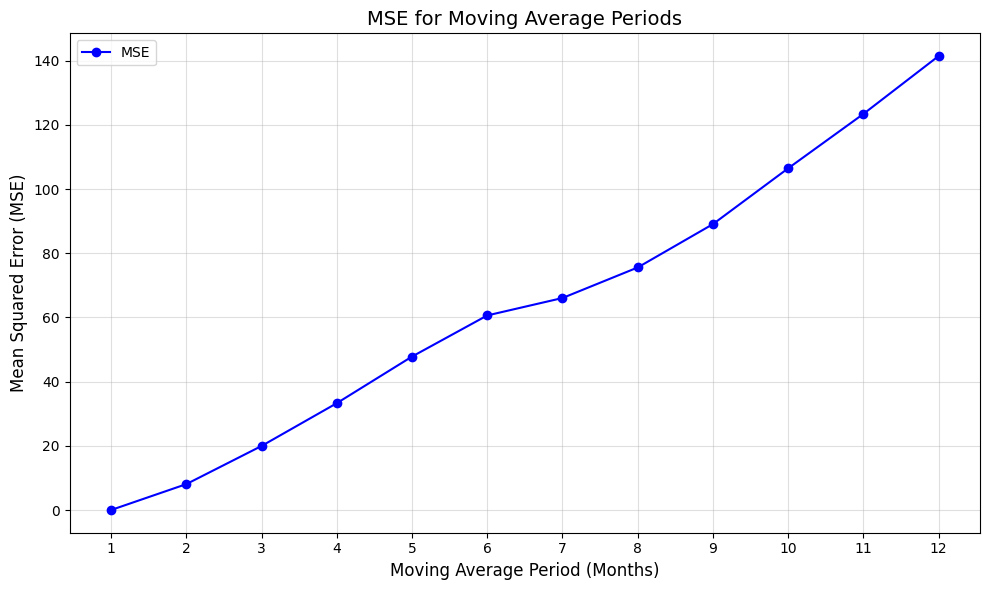

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure 'Close' is a valid column in the dataset
if 'Close' not in data.columns:
    raise ValueError("The 'Close' column is missing in the dataset. Please check your input data.")

# Resample to month-end frequency ('ME') and calculate mean closing prices
monthly_data = data['Close'].resample('ME').mean()

# Check if monthly_data is empty
if monthly_data.empty:
    raise ValueError("The 'monthly_data' is empty after resampling. Please ensure the 'Close' column contains valid data.")

# Create a DataFrame to hold the monthly closing prices and multiple moving averages
moving_averages = pd.DataFrame({'Monthly_Close': monthly_data})

# Loop to calculate and store moving averages from 1 to 12 months
for window in range(1, 13):
    moving_averages[f'{window}_Month_MA'] = monthly_data.rolling(window=window).mean()

# Initialize a dictionary to store MSE values for each moving average period
mse_values = {}

# Calculate MSE for each moving average period
for window in range(1, 13):
    # Drop NaN values simultaneously from both Monthly_Close and the rolling average
    valid_data = moving_averages[['Monthly_Close', f'{window}_Month_MA']].dropna()
    mse = mean_squared_error(valid_data['Monthly_Close'], valid_data[f'{window}_Month_MA'])
    mse_values[window] = mse

# Plot the monthly closing prices with black color
plt.figure(figsize=(14, 7))
plt.plot(moving_averages['Monthly_Close'], label='XOM Monthly Closing Price', color='black', alpha=0.5)

# Plot each moving average from 1 to 12 months
for window in range(1, 13):
    plt.plot(moving_averages[f'{window}_Month_MA'], label=f'{window}-Month MA', alpha=0.6)

# Add title, labels, and legend
plt.title('XOM Monthly Stock Price and 1-12 Month Moving Averages with MSE')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left', ncol=2)
plt.grid()

# Display MSE values on the plot
mse_text = "\n".join([f"{window}-Month MA: MSE = {mse_values[window]:.2f}" for window in range(1, 13)])
plt.text(0.02, 0.02, mse_text, fontsize=10, transform=plt.gcf().transFigure, verticalalignment='bottom')

# Show the first plot
plt.show()

# Plot the MSE values for each moving average period
plt.figure(figsize=(10, 6))
plt.plot(list(mse_values.keys()), list(mse_values.values()), marker='o', linestyle='-', color='blue', label='MSE')

# Add title and labels for the MSE plot
plt.title('MSE for Moving Average Periods', fontsize=14)
plt.xlabel('Moving Average Period (Months)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(range(1, 13))  # Ensure x-axis shows all periods
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()

# Show the second plot
plt.show()


<Figure size 1200x600 with 0 Axes>

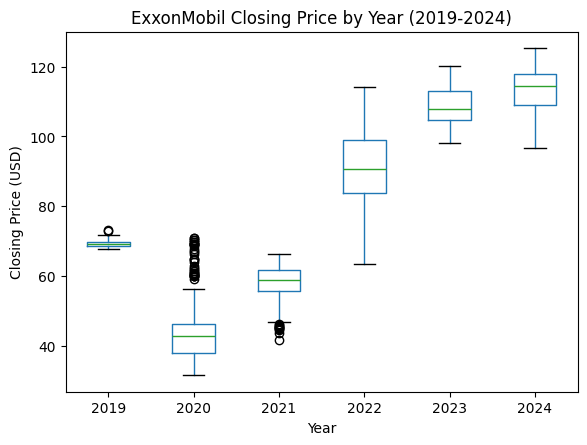

In [6]:
# Add a 'Year' column to the DataFrame
data['Year'] = data.index.year

# Create a box plot of the closing price by year
plt.figure(figsize=(12, 6))
data.boxplot(column='Close', by='Year', grid=False)
plt.title('ExxonMobil Closing Price by Year (2019-2024)')
plt.suptitle('')  # Remove automatic title by pandas
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')
plt.show()

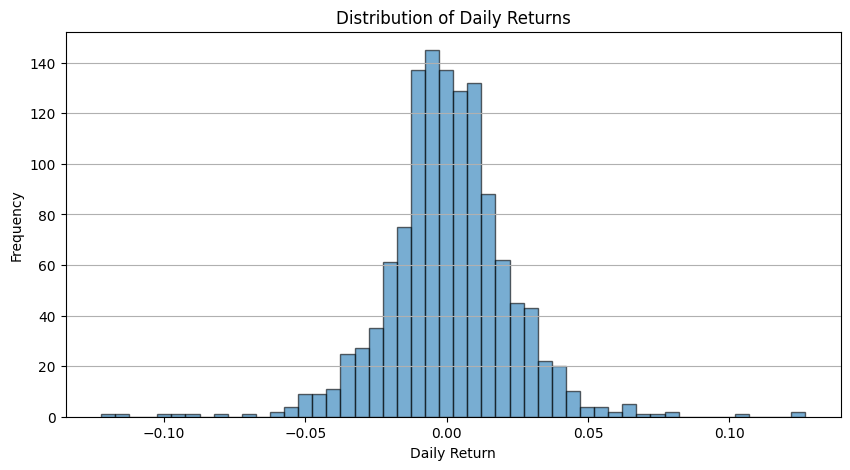

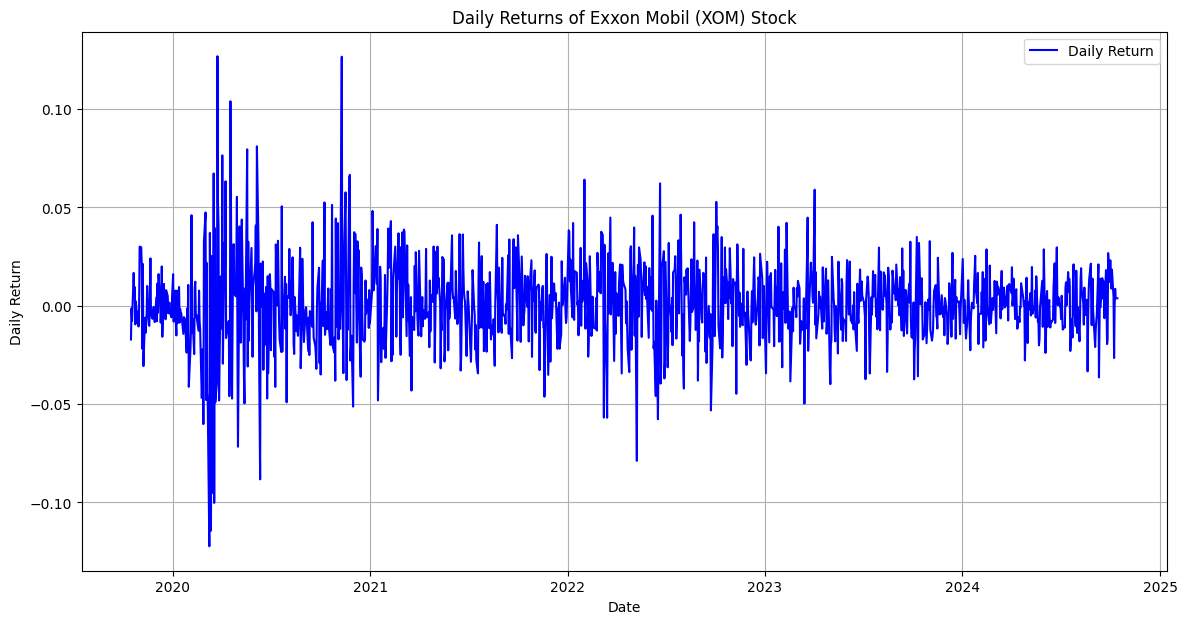

In [7]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(10, 5))
plt.hist(data['Daily Return'].dropna(), bins=50, edgecolor='k', alpha=0.6)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Plot the daily returns as a time series
plt.figure(figsize=(14, 7))
plt.plot(data['Daily Return'], color='blue', label='Daily Return')
plt.title("Daily Returns of Exxon Mobil (XOM) Stock")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1344420760.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data['Daily_Return'].resample('M').agg(lambda x: (1 + x).prod() - 1)


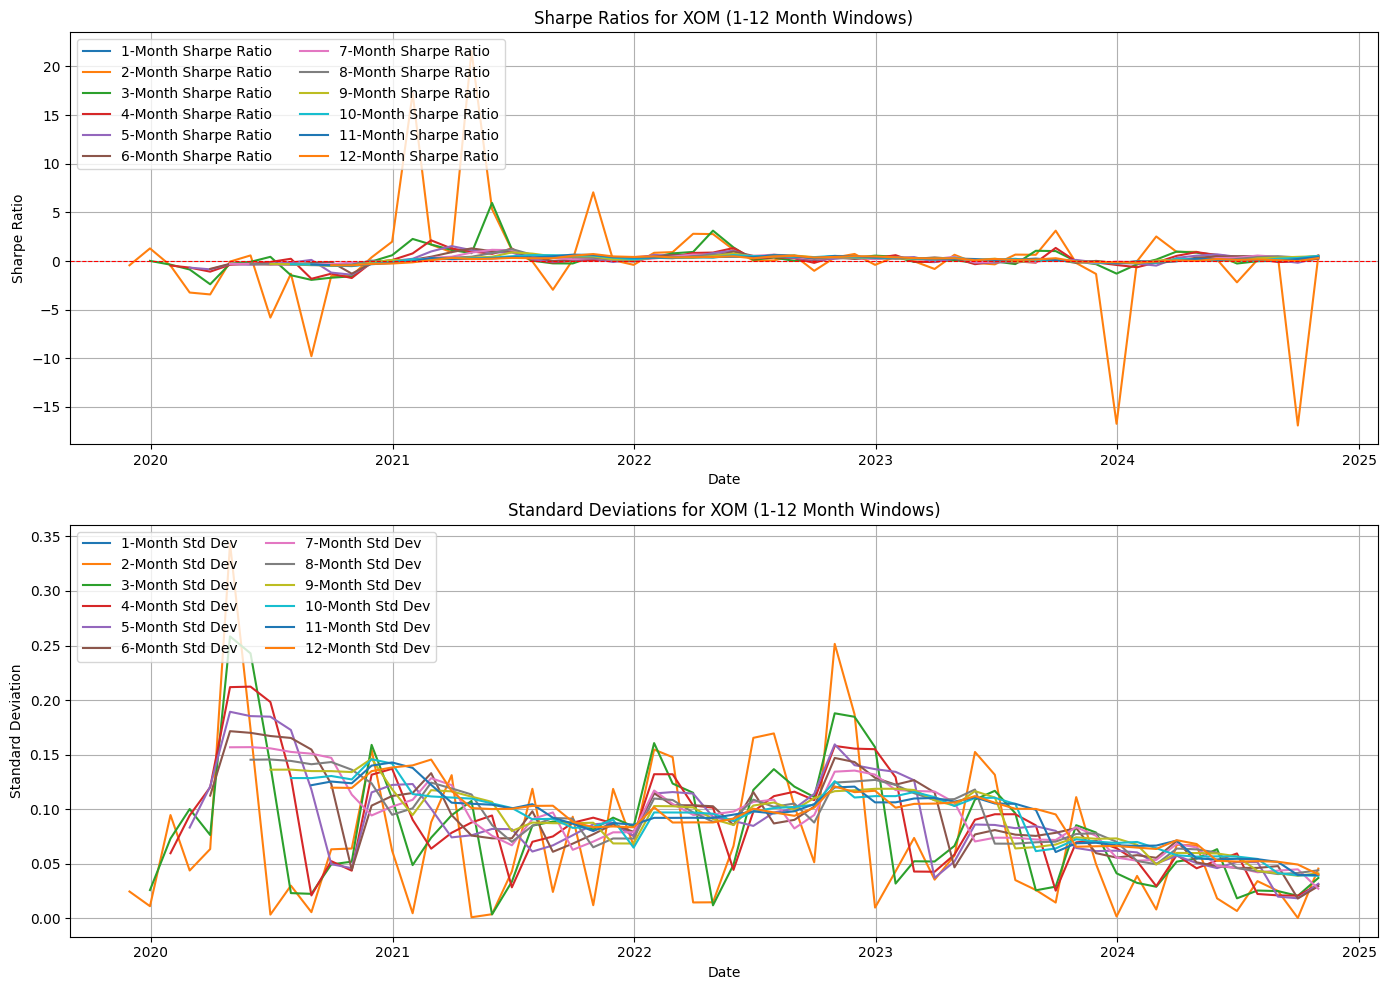

Sharpe Ratios (1-12 Month Windows):
            1          2         3         4         5         6         7   \
Date                                                                          
2019-10-31 NaN        NaN       NaN       NaN       NaN       NaN       NaN   
2019-11-30 NaN  -0.439096       NaN       NaN       NaN       NaN       NaN   
2019-12-31 NaN   1.294869  0.010976       NaN       NaN       NaN       NaN   
2020-01-31 NaN  -0.469085 -0.374644 -0.462568       NaN       NaN       NaN   
2020-02-29 NaN  -3.242841 -0.872835 -0.677525 -0.682286       NaN       NaN   
...         ..        ...       ...       ...       ...       ...       ...   
2024-06-30 NaN  -2.193573 -0.258600  0.403538  0.429476  0.495704  0.335227   
2024-07-31 NaN   0.125064 -0.021449  0.157612  0.482827  0.501932  0.560981   
2024-08-31 NaN   0.423351  0.018758 -0.103903  0.069966  0.407959  0.431516   
2024-09-30 NaN -16.911808  0.217780 -0.076122 -0.179143 -0.007010  0.348151   
2024-10-31 NaN  

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol and fetch the data
stock_symbol = 'XOM'
data = yf.download(stock_symbol, start='2019-10-15', end='2024-10-15')

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Resample to monthly frequency and calculate monthly returns
monthly_returns = data['Daily_Return'].resample('M').agg(lambda x: (1 + x).prod() - 1)

# Define the risk-free rate (e.g., 0.02 for 2%)
risk_free_rate = 0.02 / 12  # Monthly risk-free rate

# Initialize dictionaries to hold Sharpe Ratios and standard deviations for different windows
sharpe_ratios = {}
std_devs = {}

# Calculate the Sharpe Ratio and standard deviation for each month from 1 to 12
for window in range(1, 13):
    # Calculate rolling returns and standard deviation
    rolling_returns = monthly_returns.rolling(window=window).mean()
    rolling_std = monthly_returns.rolling(window=window).std()
    
    # Calculate Sharpe Ratio
    sharpe_ratio = (rolling_returns - risk_free_rate) / rolling_std
    
    # Store the Sharpe Ratios and standard deviations
    sharpe_ratios[window] = sharpe_ratio
    std_devs[window] = rolling_std

# Create DataFrames to hold Sharpe Ratios and standard deviations
sharpe_ratios_df = pd.DataFrame(sharpe_ratios)
std_devs_df = pd.DataFrame(std_devs)

# Plot the Sharpe Ratios and standard deviations
plt.figure(figsize=(14, 10))

# Plot Sharpe Ratios
plt.subplot(2, 1, 1)  # First subplot
for window in sharpe_ratios_df.columns:
    plt.plot(sharpe_ratios_df.index, sharpe_ratios_df[window], label=f'{window}-Month Sharpe Ratio')
plt.title(f'Sharpe Ratios for {stock_symbol} (1-12 Month Windows)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.axhline(0, color='red', linewidth=0.8, linestyle='--')  # Add a line at 0 for reference
plt.legend(loc='upper left', ncol=2)
plt.grid()

# Plot Standard Deviations
plt.subplot(2, 1, 2)  # Second subplot
for window in std_devs_df.columns:
    plt.plot(std_devs_df.index, std_devs_df[window], label=f'{window}-Month Std Dev')
plt.title(f'Standard Deviations for {stock_symbol} (1-12 Month Windows)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left', ncol=2)
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

# Print the Sharpe Ratios and Standard Deviations
print("Sharpe Ratios (1-12 Month Windows):")
print(sharpe_ratios_df)
print("\nStandard Deviations (1-12 Month Windows):")
print(std_devs_df)


In [9]:
import yfinance as yf
import pandas as pd

# Define the stock symbols
stocks = ['XOM', 'PFE', 'MSFT']

# Fetch the stock data for the last 5 years
start_date = '2019-10-15'
end_date = '2024-10-15'

# Download historical market data for all stocks
data = yf.download(stocks, start=start_date, end=end_date, group_by="ticker")

# Prepare a dictionary to hold individual stock data
stock_data_frames = {}

# Extract and organize data for each stock
for stock in stocks:
    df = data[stock].reset_index()  # Reset index for cleaner format
    df['Date'] = df['Date'].dt.tz_localize(None)  # Remove timezone from datetime
    stock_data_frames[stock] = df

# Save all stock data to a single Excel file
with pd.ExcelWriter('stocks_prices_5_years.xlsx') as writer:
    for stock, df in stock_data_frames.items():
        df.to_excel(writer, sheet_name=stock, index=False)

# Display a summary of the data
for stock, df in stock_data_frames.items():
    print(f"\n{stock} Data:")
    print(df.head())


[*********************100%***********************]  3 of 3 completed


PermissionError: [Errno 13] Permission denied: 'stocks_prices_5_years.xlsx'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Define the stock symbols
stocks = ['XOM', 'PFE', 'MSFT']

# Fetch the stock data for the last 5 years
start_date = '2019-10-15'
end_date = '2024-10-15'
data = yf.download(stocks, start=start_date, end=end_date)['Close']

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap with blue tones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Stock Closing Prices')
plt.show()

# Display correlation values
print("Correlation Matrix:")
print(correlation_matrix)


[*********************100%***********************]  3 of 3 completed


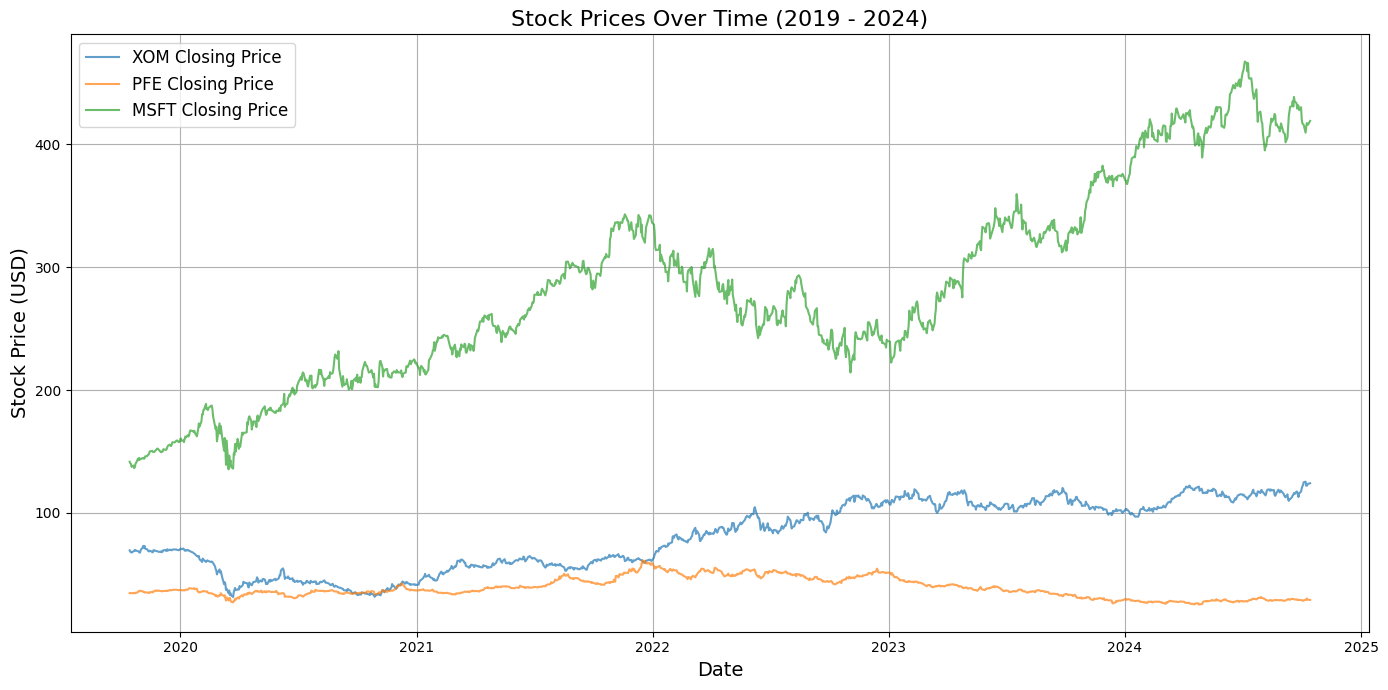

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define stock symbols
stocks = ['XOM', 'PFE', 'MSFT']

# Fetch historical data for the last 5 years
start_date = '2019-10-15'
end_date = '2024-10-15'
data = yf.download(stocks, start=start_date, end=end_date)

# Extract only the closing prices
closing_prices = data['Close']

# Plot stock prices
plt.figure(figsize=(14, 7))

# Plot each stock's closing price
for stock in stocks:
    plt.plot(closing_prices[stock], label=f'{stock} Closing Price', alpha=0.7)

# Customize the plot
plt.title('Stock Prices Over Time (2019 - 2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price (USD)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


[*********************100%***********************]  3 of 3 completed


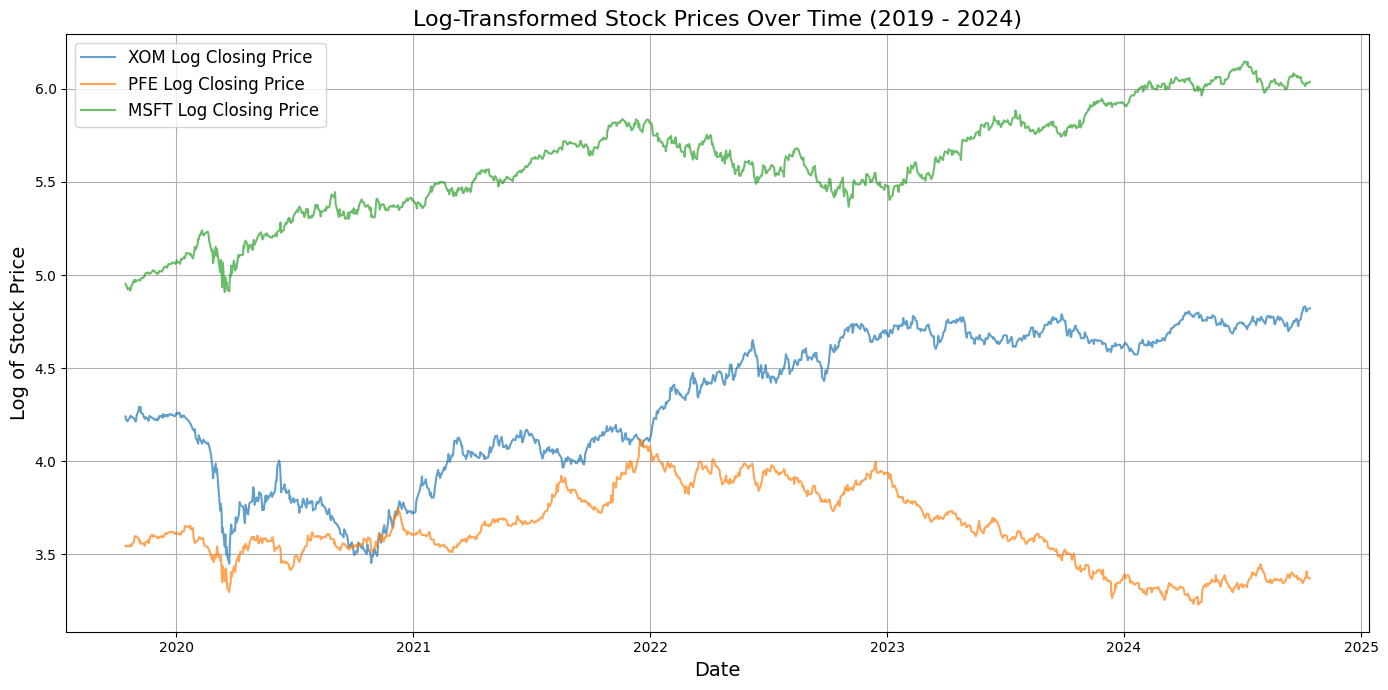

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Define stock symbols
stocks = ['XOM', 'PFE', 'MSFT']

# Fetch historical data for the last 5 years
start_date = '2019-10-15'
end_date = '2024-10-15'
data = yf.download(stocks, start=start_date, end=end_date)

# Extract closing prices
closing_prices = data['Close']

# Apply logarithmic transformation
log_prices = np.log(closing_prices)

# Plot the log-transformed stock prices
plt.figure(figsize=(14, 7))

# Plot each stock's log-transformed closing price
for stock in stocks:
    plt.plot(log_prices[stock], label=f'{stock} Log Closing Price', alpha=0.7)

# Customize the plot
plt.title('Log-Transformed Stock Prices Over Time (2019 - 2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Log of Stock Price', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


[*********************100%***********************]  3 of 3 completed


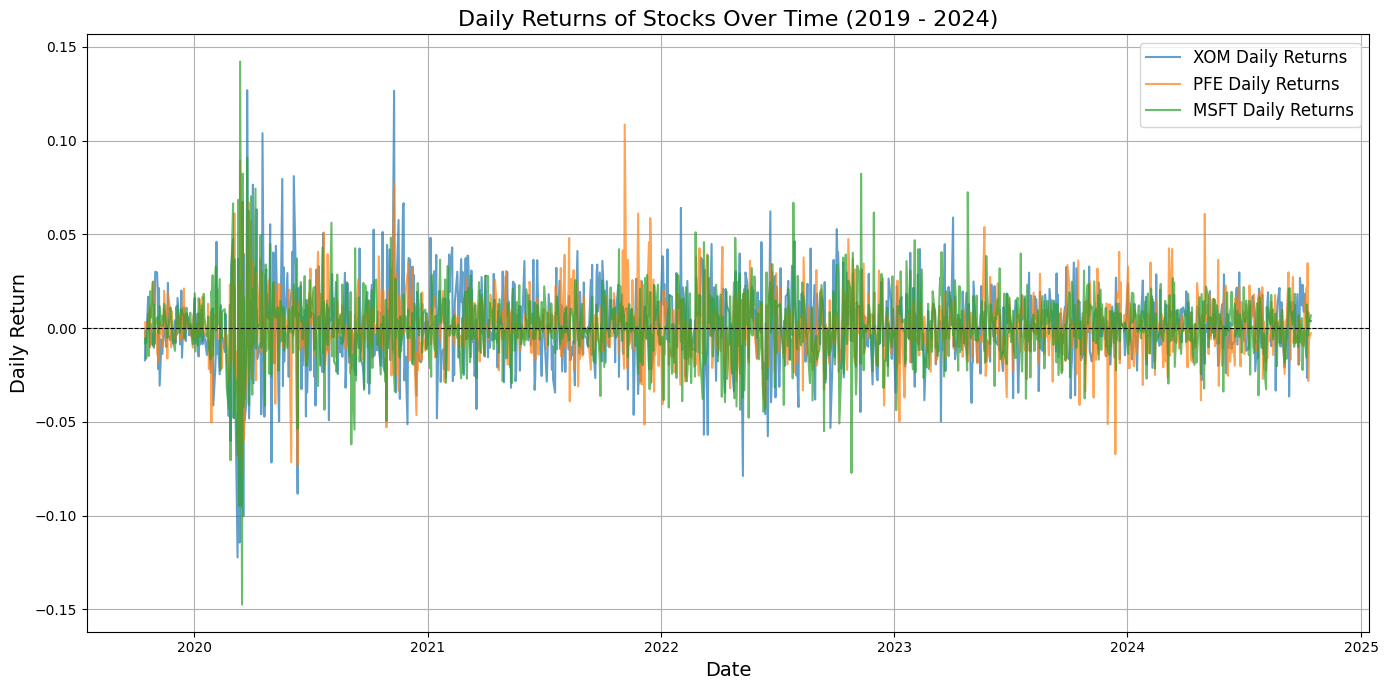

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Define stock symbols
stocks = ['XOM', 'PFE', 'MSFT']

# Fetch historical data for the last 5 years
start_date = '2019-10-15'
end_date = '2024-10-15'
data = yf.download(stocks, start=start_date, end=end_date)

# Extract closing prices
closing_prices = data['Close']

# Calculate percentage change (daily returns) from raw prices
returns = closing_prices.pct_change().dropna()

# Plot the returns over time
plt.figure(figsize=(14, 7))

# Plot each stock's returns
for stock in stocks:
    plt.plot(returns[stock], label=f'{stock} Daily Returns', alpha=0.7)

# Customize the plot
plt.title('Daily Returns of Stocks Over Time (2019 - 2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Horizontal line at 0
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


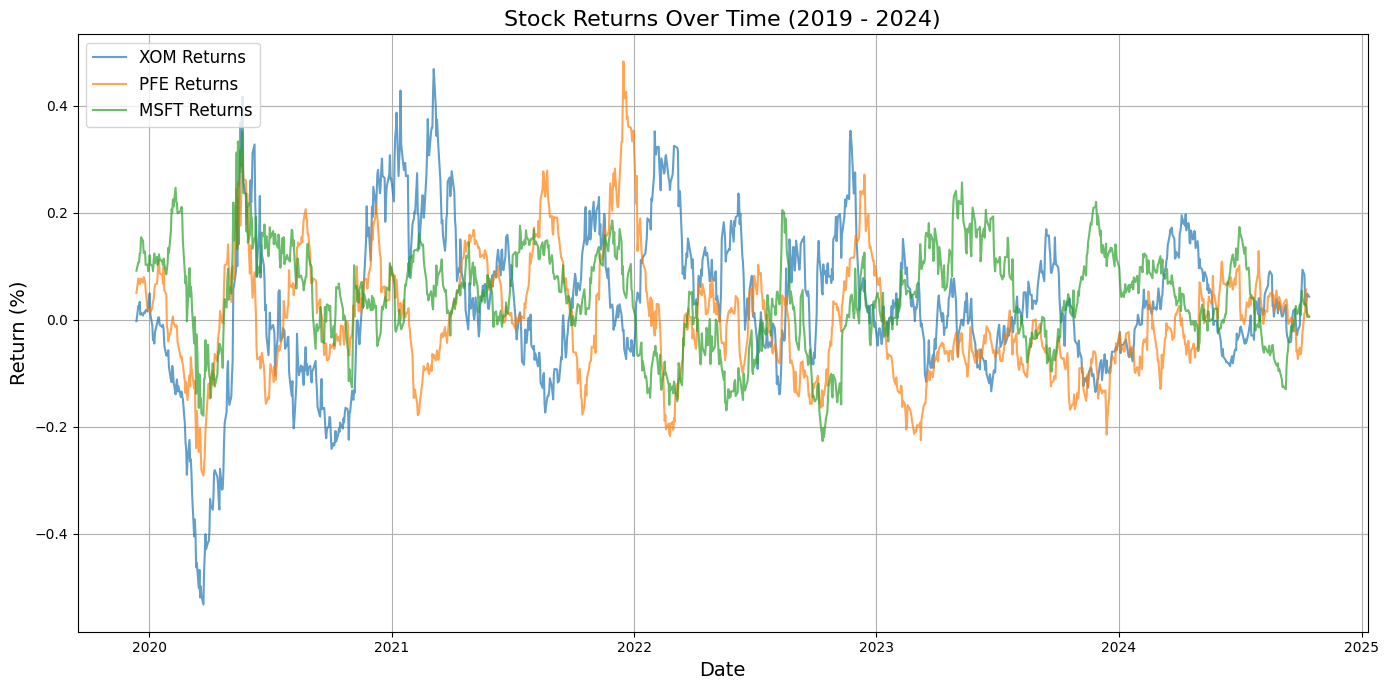

In [13]:
# Calculate returns for each stock
for stock in stocks:
    stock_returns = closing_prices[stock].pct_change(periods=42)  # 2 months
    data[f'{stock}_Returns'] = stock_returns

# Plot the returns
plt.figure(figsize=(14, 7))

# Plot each stock's returns
for stock in stocks:
    plt.plot(data[f'{stock}_Returns'], label=f'{stock} Returns', alpha=0.7)

# Customize the plot
plt.title('Stock Returns Over Time (2019 - 2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Return (%)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()


In [14]:
import yfinance as yf
import pandas as pd

# Define the stock symbols
stocks = ['XOM', 'PFE', 'MSFT']

# Fetch the stock data for the last 5 years (from October 15, 2019)
start_date = '2019-10-15'
end_date = '2024-10-15'

# Create a Pandas Excel writer to save data into separate sheets
with pd.ExcelWriter('stock_prices_5_years.xlsx') as writer:
    for stock in stocks:
        # Download historical market data for the stock
        data = yf.download(stock, start=start_date, end=end_date)
        
        # Write the data to a sheet named after the stock symbol
        data.to_excel(writer, sheet_name=stock)
        print(f"Exported data for {stock} to the Excel file.")

print("Data has been successfully exported to 'stock_prices_5_years.xlsx'.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Exported data for XOM to the Excel file.
Exported data for PFE to the Excel file.
Exported data for MSFT to the Excel file.


Data has been successfully exported to 'stock_prices_5_years.xlsx'.


In [15]:
import yfinance as yf
import pandas as pd

# Define the stock symbols
stocks = ['XOM', 'PFE', 'MSFT']

# Fetch the stock data for the last 5 years (from October 15, 2019)
start_date = '2019-10-15'
end_date = '2024-10-15'

# Create a Pandas Excel writer to save data into separate sheets
with pd.ExcelWriter('stock_prices_with_returns.xlsx') as writer:
    for stock in stocks:
        # Download historical market data for the stock
        data = yf.download(stock, start=start_date, end=end_date)
        
        # Calculate 2-month returns (approximately 42 trading days)
        data['2-Month Returns'] = data['Close'].pct_change(periods=42)
        
        # Write the data to a sheet named after the stock symbol
        data.to_excel(writer, sheet_name=stock)
        print(f"Exported data for {stock} with returns to the Excel file.")

print("Data with returns has been successfully exported to 'stock_prices_with_returns.xlsx'.")



PermissionError: [Errno 13] Permission denied: 'stock_prices_with_returns.xlsx'

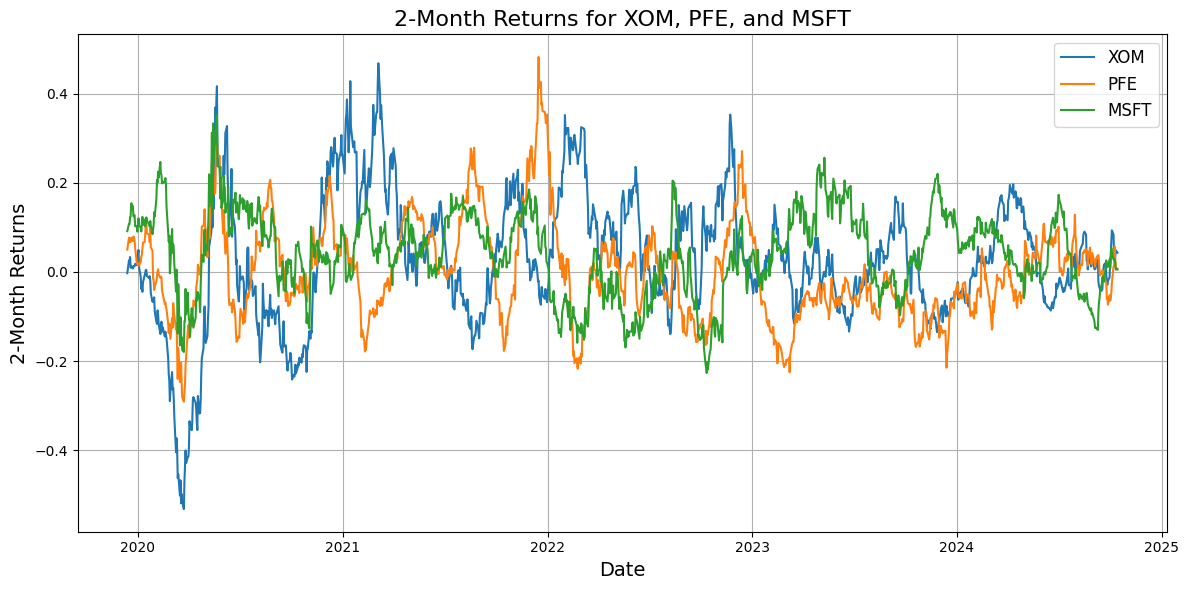

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with the stock data and returns
file_path = 'C:/Users/PINYKEWD/anaconda3/Machine Learning and FinTech Homework/Project/stock_prices_with_returns.xlsx'

# Dictionary to store dataframes for each stock
stocks_data = {}

# Read each sheet from the Excel file into a dictionary
excel_data = pd.ExcelFile(file_path)
for sheet_name in excel_data.sheet_names:
    stocks_data[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)

# Plot the 2-Month Returns for each stock
plt.figure(figsize=(12, 6))

for stock, data in stocks_data.items():
    # Drop rows with NaN values in the '2-Month Returns' column
    data = data.dropna(subset=['2-Month Returns'])
    
    # Plot the 2-Month Returns
    plt.plot(data.index, data['2-Month Returns'], label=stock)

# Add plot details
plt.title('2-Month Returns for XOM, PFE, and MSFT', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('2-Month Returns', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


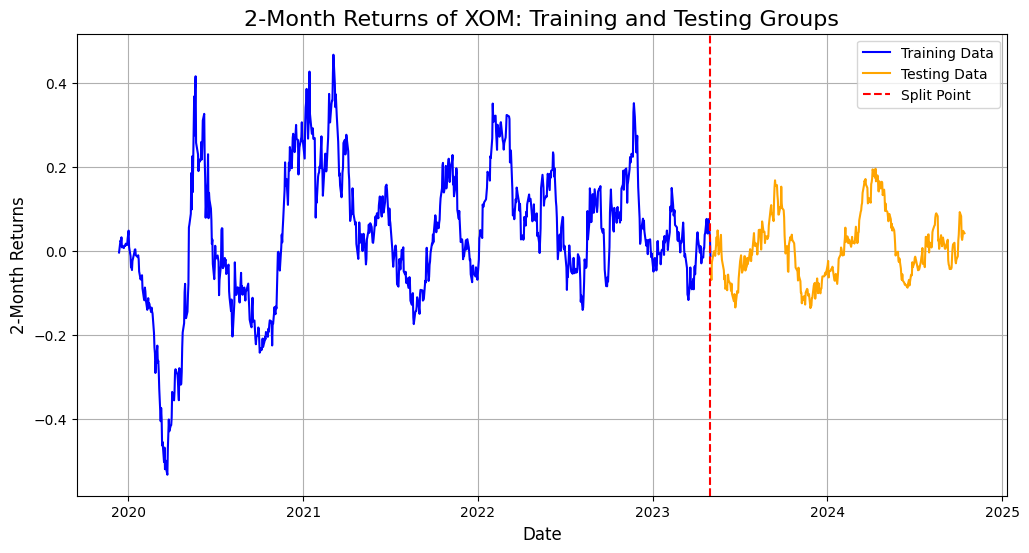

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'C:/Users/PINYKEWD/anaconda3/Machine Learning and FinTech Homework/Project/stock_prices_with_returns.xlsx'
data = pd.read_excel(file_path, sheet_name='XOM', index_col=0)

# Keep only the '2-Month Returns' column and drop NaN values
returns_data = data[['2-Month Returns']].dropna()

# Split the data into training (70%) and testing (30%) groups
split_point = int(len(returns_data) * 0.7)
train_data = returns_data[:split_point]
test_data = returns_data[split_point:]

# Visualize the training and testing groups
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['2-Month Returns'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['2-Month Returns'], label='Testing Data', color='orange')
plt.axvline(train_data.index[-1], color='red', linestyle='--', label='Split Point')
plt.title('2-Month Returns of XOM: Training and Testing Groups', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2-Month Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported 

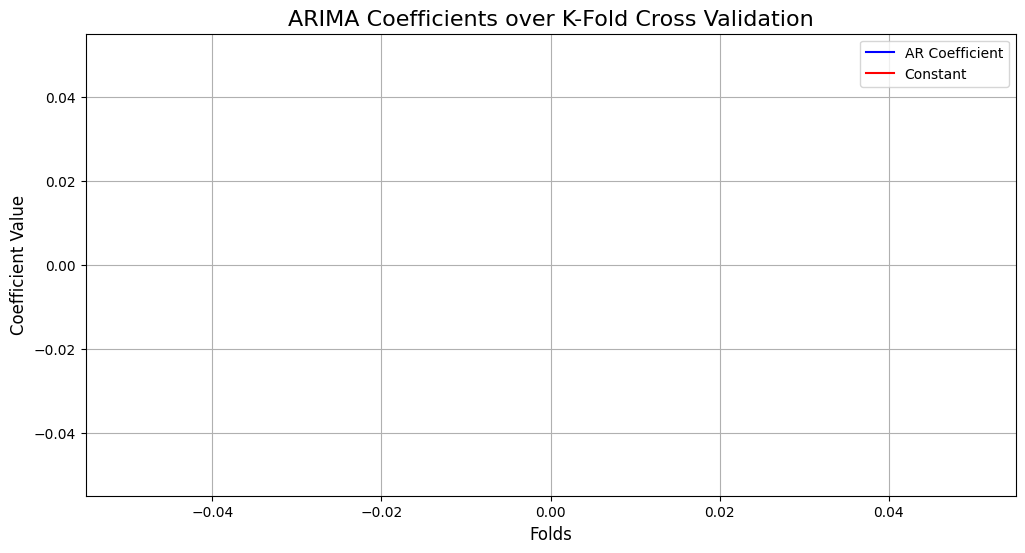

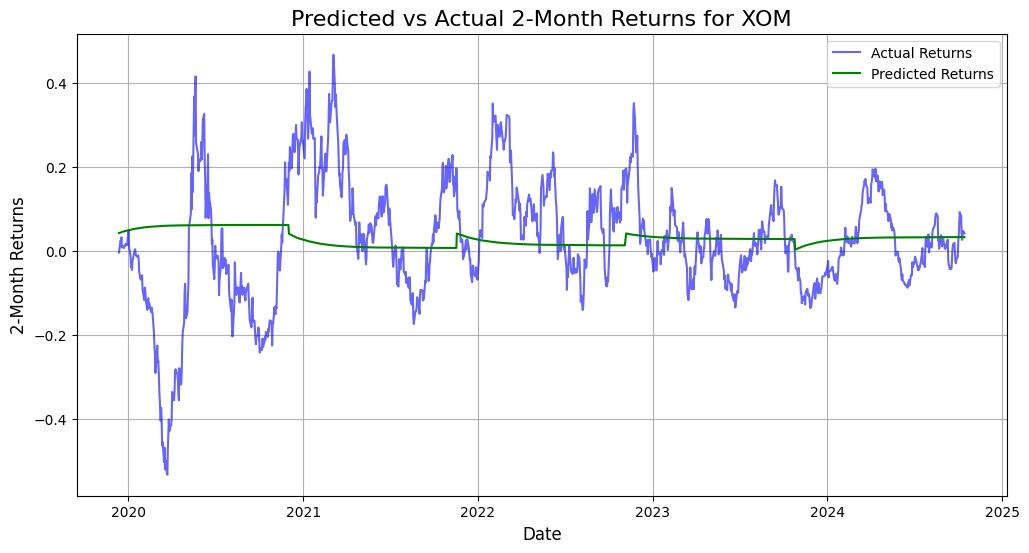

ARIMA Predictive Equation (AR(1) Model):

Y_t = 0.03393507584471053 + 0.9739025440150028 * Y_(t-1)
Mean Squared Error across folds: 0.022477590884939648


C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1097822498.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Y_t = {last_model_params[0]} + {last_model_params[1]} * Y_(t-1)")


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load the Excel file
file_path = 'C:/Users/PINYKEWD/anaconda3/Machine Learning and FinTech Homework/Project/stock_prices_with_returns.xlsx'
data = pd.read_excel(file_path, sheet_name='XOM', index_col=0)

# Keep only the '2-Month Returns' column and drop NaN values
returns_data = data[['2-Month Returns']].dropna()

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=False)  # No shuffle to respect the time order

# Store the coefficients and errors for each fold
arima_coefficients = []
predictions = []
errors = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(returns_data):
    # Split the data into training and testing sets for this fold
    train_data = returns_data.iloc[train_index]
    test_data = returns_data.iloc[test_index]
    
    # Define and fit the ARIMA model (ARIMA(p=1, d=0, q=0) as an example)
    model = ARIMA(train_data, order=(1, 0, 0))
    model_fit = model.fit()
    
    # Store the ARIMA coefficients (AR Coeff, Constant)
    arima_coefficients.append(model_fit.params)
    
    # Predict the next period
    forecast = model_fit.forecast(steps=len(test_data))
    
    # Store predictions and calculate error
    predictions.extend(forecast)
    fold_error = mean_squared_error(test_data, forecast)
    errors.append(fold_error)

# Convert the coefficients list to a DataFrame for easier visualization
coefficients_df = pd.DataFrame(arima_coefficients, columns=['Constant', 'AR Coeff'])

# Visualize the ARIMA coefficients over the folds
plt.figure(figsize=(12, 6))
plt.plot(coefficients_df['AR Coeff'], label='AR Coefficient', color='blue')
plt.plot(coefficients_df['Constant'], label='Constant', color='red')
plt.title('ARIMA Coefficients over K-Fold Cross Validation', fontsize=16)
plt.xlabel('Folds', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Visualize predictions vs actual returns
plt.figure(figsize=(12, 6))
plt.plot(returns_data.index, returns_data['2-Month Returns'], label='Actual Returns', color='blue', alpha=0.6)
plt.plot(returns_data.index[-len(predictions):], predictions, label='Predicted Returns', color='green')
plt.title('Predicted vs Actual 2-Month Returns for XOM', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2-Month Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print the predictive equation for the last model (example)
last_model_params = arima_coefficients[-1]
print(f"ARIMA Predictive Equation (AR(1) Model):\n")
print(f"Y_t = {last_model_params[0]} + {last_model_params[1]} * Y_(t-1)")
print(f"Mean Squared Error across folds: {np.mean(errors)}")


C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported 

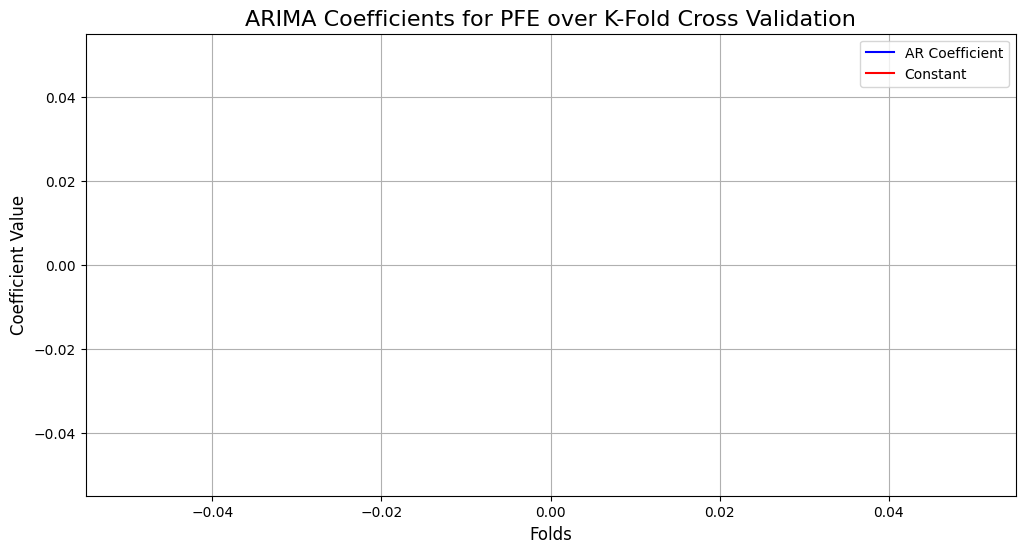

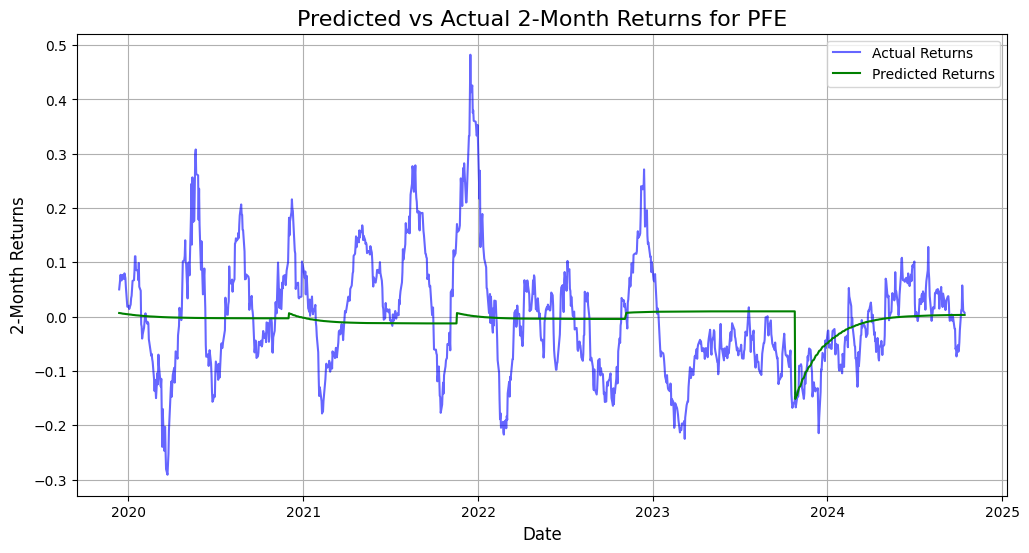

ARIMA Predictive Equation for PFE (AR(1) Model):

Y_t = 0.003655795952089616 + 0.9761971581086287 * Y_(t-1)
Mean Squared Error across folds: 0.011552574380464744


C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\2328326117.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Y_t = {last_model_params[0]} + {last_model_params[1]} * Y_(t-1)")
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PINYKEWD\AppData\Local\Programs\Python\P

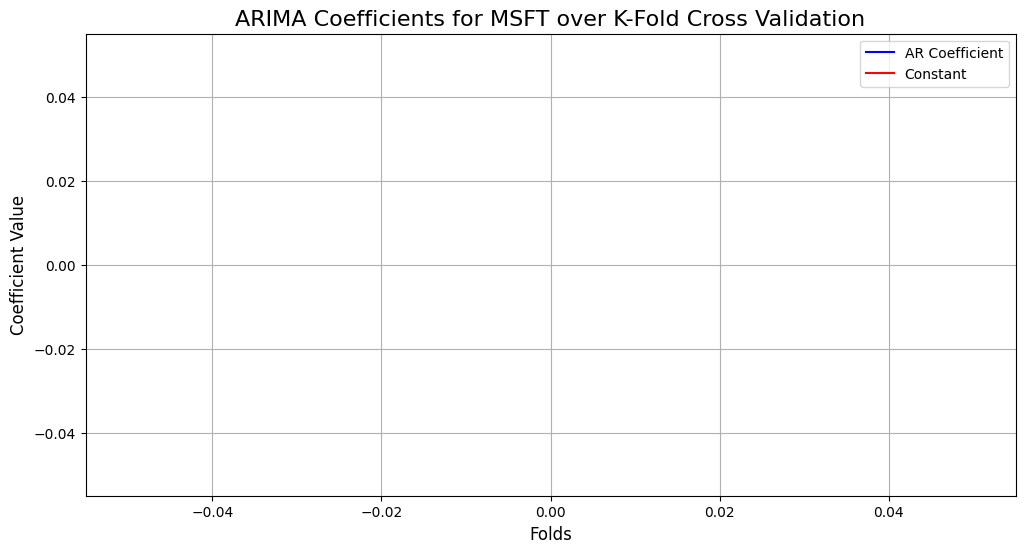

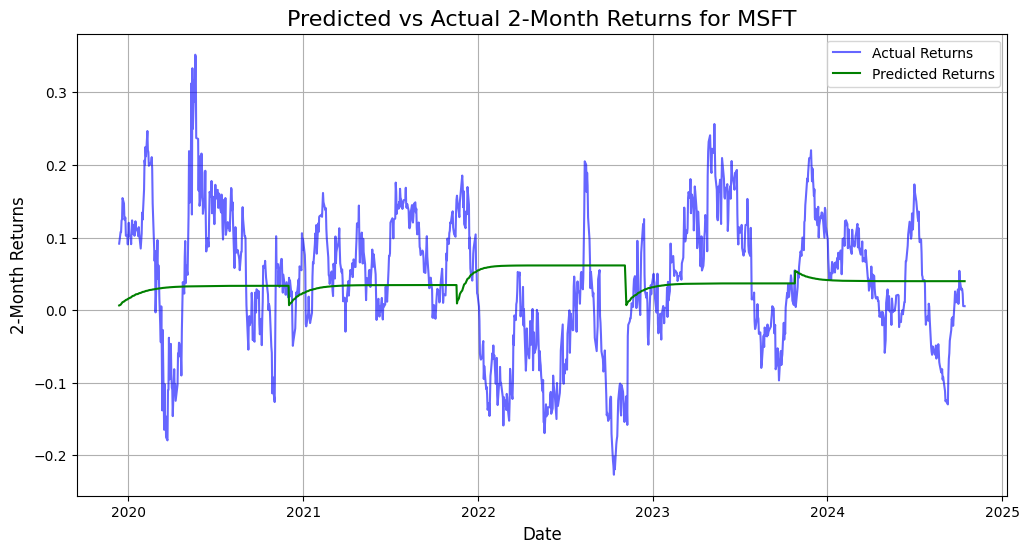

ARIMA Predictive Equation for MSFT (AR(1) Model):

Y_t = 0.03988269259684269 + 0.9526105735593201 * Y_(t-1)
Mean Squared Error across folds: 0.00954537714565019


C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\2328326117.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Y_t = {last_model_params[0]} + {last_model_params[1]} * Y_(t-1)")


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load the Excel file
file_path = 'C:/Users/PINYKEWD/anaconda3/Machine Learning and FinTech Homework/Project/stock_prices_with_returns.xlsx'

# Define a function to train ARIMA model with K-Fold Cross Validation for a given stock
def train_arima_with_kfold(stock_name):
    # Load the data for the specific stock
    data = pd.read_excel(file_path, sheet_name=stock_name, index_col=0)
    
    # Keep only the '2-Month Returns' column and drop NaN values
    returns_data = data[['2-Month Returns']].dropna()

    # Define the number of folds for cross-validation
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=False)  # No shuffle to respect the time order

    # Store the coefficients and errors for each fold
    arima_coefficients = []
    predictions = []
    errors = []

    # K-Fold Cross-Validation
    for train_index, test_index in kf.split(returns_data):
        # Split the data into training and testing sets for this fold
        train_data = returns_data.iloc[train_index]
        test_data = returns_data.iloc[test_index]
        
        # Define and fit the ARIMA model (ARIMA(p=1, d=0, q=0) as an example)
        model = ARIMA(train_data, order=(1, 0, 0))
        model_fit = model.fit()
        
        # Store the ARIMA coefficients (AR Coeff, Constant)
        arima_coefficients.append(model_fit.params)
        
        # Predict the next period
        forecast = model_fit.forecast(steps=len(test_data))
        
        # Store predictions and calculate error
        predictions.extend(forecast)
        fold_error = mean_squared_error(test_data, forecast)
        errors.append(fold_error)

    # Convert the coefficients list to a DataFrame for easier visualization
    coefficients_df = pd.DataFrame(arima_coefficients, columns=['Constant', 'AR Coeff'])

    # Visualize the ARIMA coefficients over the folds
    plt.figure(figsize=(12, 6))
    plt.plot(coefficients_df['AR Coeff'], label='AR Coefficient', color='blue')
    plt.plot(coefficients_df['Constant'], label='Constant', color='red')
    plt.title(f'ARIMA Coefficients for {stock_name} over K-Fold Cross Validation', fontsize=16)
    plt.xlabel('Folds', fontsize=12)
    plt.ylabel('Coefficient Value', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualize predictions vs actual returns
    plt.figure(figsize=(12, 6))
    plt.plot(returns_data.index, returns_data['2-Month Returns'], label='Actual Returns', color='blue', alpha=0.6)
    plt.plot(returns_data.index[-len(predictions):], predictions, label='Predicted Returns', color='green')
    plt.title(f'Predicted vs Actual 2-Month Returns for {stock_name}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('2-Month Returns', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the predictive equation for the last model (example)
    last_model_params = arima_coefficients[-1]
    print(f"ARIMA Predictive Equation for {stock_name} (AR(1) Model):\n")
    print(f"Y_t = {last_model_params[0]} + {last_model_params[1]} * Y_(t-1)")
    print(f"Mean Squared Error across folds: {np.mean(errors)}")

# Train ARIMA model using K-Fold Cross Validation for PFE and MSFT
train_arima_with_kfold('PFE')
train_arima_with_kfold('MSFT')


C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1304872260.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t_xom = alpha_xom * (0.033935 + 0.9739 * xom_returns[t-1] if t > 0 else 0)
C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1304872260.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t_pfe = alpha_pfe * (0.003656 + 0.9762 * pfe_returns[t-1] if t > 0 else 0)
C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1304872260.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Optimal Weights for Each 2-Month Period:
      XOM Weight    PFE Weight  MSFT Weight
0   4.086296e-16  0.000000e+00          1.0
1   7.125234e-16  1.457168e-16          1.0
2   4.006172e-16  0.000000e+00          1.0
3   0.000000e+00  2.775558e-17          1.0
4   0.000000e+00  0.000000e+00          1.0
5   0.000000e+00  1.595946e-16          1.0
6   2.220446e-16  2.359224e-16          1.0
7   0.000000e+00  0.000000e+00          1.0
8   0.000000e+00  0.000000e+00          1.0
9   3.845925e-16  0.000000e+00          1.0
10  0.000000e+00  3.053113e-16          1.0
11  0.000000e+00  3.608225e-16          1.0
12  0.000000e+00  4.718448e-16          1.0
13  4.807407e-17  1.942890e-16          1.0
14  0.000000e+00  6.938894e-17          1.0
15  0.000000e+00  0.000000e+00          1.0
16  4.967654e-16  3.747003e-16          1.0
17  2.827124e-16  2.081668e-17          1.0
18  4.484037e-16  2.498002e-16          1.0
19  2.518136e-16  0.000000e+00          1.0
20  0.000000e+00  0.000000e+00     

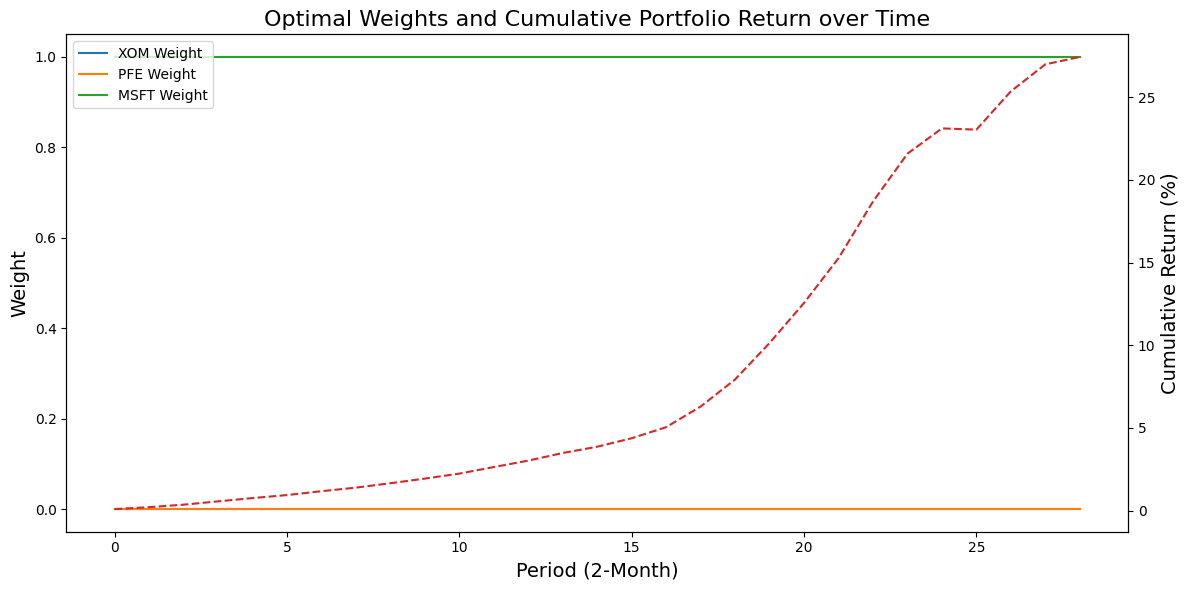

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the Excel file with the stock data and returns
file_path = 'C:/Users/PINYKEWD/anaconda3/Machine Learning and FinTech Homework/Project/stock_prices_with_returns.xlsx'

# Dictionary to store dataframes for each stock
stocks_data = {}

# Read each sheet from the Excel file into a dictionary
excel_data = pd.ExcelFile(file_path)
for sheet_name in excel_data.sheet_names:
    stocks_data[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)

# Extract the 2-Month Returns for XOM, PFE, and MSFT
xom_returns = stocks_data['XOM']['2-Month Returns'].dropna()
pfe_returns = stocks_data['PFE']['2-Month Returns'].dropna()
msft_returns = stocks_data['MSFT']['2-Month Returns'].dropna()

# Ensure the data is aligned to 60 months (5 years)
xom_returns = xom_returns[:60]
pfe_returns = pfe_returns[:60]
msft_returns = msft_returns[:60]

# Define the combined return calculation based on the predictive equation
def combined_return(weights, xom_returns, pfe_returns, msft_returns, t):
    alpha_xom, alpha_pfe, alpha_msft = weights
    
    # Using the combined predictive equation
    y_t_xom = alpha_xom * (0.033935 + 0.9739 * xom_returns[t-1] if t > 0 else 0)
    y_t_pfe = alpha_pfe * (0.003656 + 0.9762 * pfe_returns[t-1] if t > 0 else 0)
    y_t_msft = alpha_msft * (0.039883 + 0.9526 * msft_returns[t-1] if t > 0 else 0)
    
    # Total return for the portfolio at time t
    return -(y_t_xom + y_t_pfe + y_t_msft)  # We negate it for minimization

# Constraints: sum of weights should be equal to 1
def weight_constraint(weights):
    return np.sum(weights) - 1

# Initial guess for the weights (equally distributed among the stocks)
initial_weights = [1/3, 1/3, 1/3]

# Set the bounds for each weight to be between 0 and 1
bounds = [(0, 1), (0, 1), (0, 1)]

# Store the optimal weights for each 2-month period
optimal_weights_over_time = []

# Loop through the time periods and optimize weights every 2 months (total of 30 times over 5 years)
for t in range(1, len(xom_returns), 2):  # Start from time step 1 (second period), re-weight every 2 months
    # Limit the data to the period up to the current point t (inclusive)
    if t + 2 <= len(xom_returns):  # Avoid going out of bounds
        xom_subset = xom_returns[:t+2]
        pfe_subset = pfe_returns[:t+2]
        msft_subset = msft_returns[:t+2]
        
        # Optimize the weights for the current time period
        result = minimize(
            combined_return, 
            initial_weights, 
            args=(xom_subset, pfe_subset, msft_subset, t),
            constraints={'type': 'eq', 'fun': weight_constraint}, 
            bounds=bounds,
            method='SLSQP'
        )
        
        # Get the optimal weights for this period
        optimal_weights = result.x
        optimal_weights_over_time.append(optimal_weights)

# Convert the list of optimal weights to a DataFrame for easier visualization
optimal_weights_df = pd.DataFrame(optimal_weights_over_time, columns=['XOM Weight', 'PFE Weight', 'MSFT Weight'])

# Output the optimal weights for each 2-month period
print("Optimal Weights for Each 2-Month Period:")
print(optimal_weights_df)

# Now, calculate the total return by applying the weights over the 30 periods
total_return = 1  # Starting with an initial investment of 1 (100%)

# Store the portfolio returns for plotting
portfolio_returns = []

# Iterate through the periods and calculate the weighted returns
for i in range(len(optimal_weights_df)):
    weight_XOM = optimal_weights_df['XOM Weight'][i]
    weight_PFE = optimal_weights_df['PFE Weight'][i]
    weight_MSFT = optimal_weights_df['MSFT Weight'][i]
    
    return_XOM = xom_returns[i * 2]  # Returns are every 2 months
    return_PFE = pfe_returns[i * 2]  # Returns are every 2 months
    return_MSFT = msft_returns[i * 2]  # Returns are every 2 months
    
    # Calculate the weighted return for this period
    period_return = (weight_XOM * return_XOM) + (weight_PFE * return_PFE) + (weight_MSFT * return_MSFT)
    
    # Update the total return by compounding it
    total_return *= (1 + period_return)  # Compounding return
    portfolio_returns.append(total_return - 1)  # Store cumulative return

# Final total return over 5 years
total_return -= 1  # Subtract 1 to get the actual return (as a percentage)
total_return *= 100  # Convert to percentage

print(f"Total Return over 5 years: {total_return:.2f}%")

# Plot the optimal weights and portfolio return
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the weights for XOM, PFE, MSFT
ax1.set_xlabel('Period (2-Month)', fontsize=14)
ax1.set_ylabel('Weight', fontsize=14)
ax1.plot(optimal_weights_df.index, optimal_weights_df['XOM Weight'], label='XOM Weight', color='tab:blue')
ax1.plot(optimal_weights_df.index, optimal_weights_df['PFE Weight'], label='PFE Weight', color='tab:orange')
ax1.plot(optimal_weights_df.index, optimal_weights_df['MSFT Weight'], label='MSFT Weight', color='tab:green')

ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for portfolio return
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=14)
ax2.plot(optimal_weights_df.index, portfolio_returns, label='Cumulative Portfolio Return', color='tab:red', linestyle='--')
ax2.tick_params(axis='y')

# Title and layout
plt.title('Optimal Weights and Cumulative Portfolio Return over Time', fontsize=16)
fig.tight_layout()

# Show the plot
plt.show()


C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1871686819.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t_xom = alpha_xom * (0.033935 + 0.9739 * xom_returns[t-1] if t > 0 else 0)
C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1871686819.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t_pfe = alpha_pfe * (0.003656 + 0.9762 * pfe_returns[t-1] if t > 0 else 0)
C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\1871686819.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Total Return over 5 years (Dynamic Weight): 2743.88%
Total Return over 5 years (Equal Weight): 44.07%


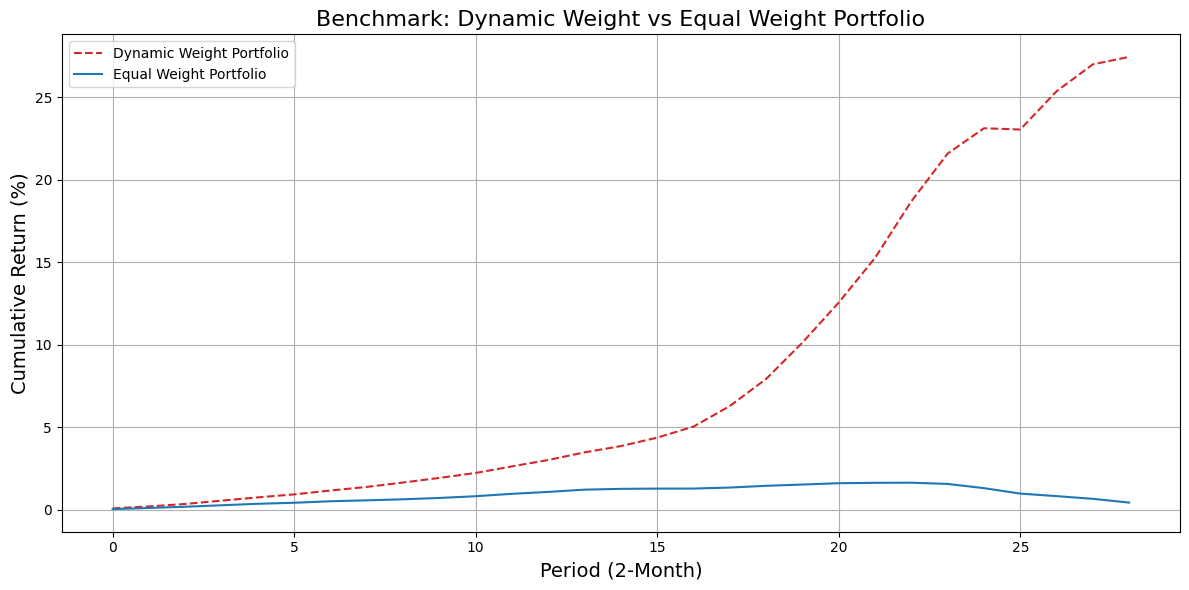

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the Excel file with the stock data and returns
file_path = 'C:/Users/PINYKEWD/anaconda3/Machine Learning and FinTech Homework/Project/stock_prices_with_returns.xlsx'

# Dictionary to store dataframes for each stock
stocks_data = {}

# Read each sheet from the Excel file into a dictionary
excel_data = pd.ExcelFile(file_path)
for sheet_name in excel_data.sheet_names:
    stocks_data[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)

# Extract the 2-Month Returns for XOM, PFE, and MSFT
xom_returns = stocks_data['XOM']['2-Month Returns'].dropna()
pfe_returns = stocks_data['PFE']['2-Month Returns'].dropna()
msft_returns = stocks_data['MSFT']['2-Month Returns'].dropna()

# Ensure the data is aligned to 60 months (5 years)
xom_returns = xom_returns[:60]
pfe_returns = pfe_returns[:60]
msft_returns = msft_returns[:60]

# Define the combined return calculation based on the predictive equation
def combined_return(weights, xom_returns, pfe_returns, msft_returns, t):
    alpha_xom, alpha_pfe, alpha_msft = weights
    
    # Using the combined predictive equation
    y_t_xom = alpha_xom * (0.033935 + 0.9739 * xom_returns[t-1] if t > 0 else 0)
    y_t_pfe = alpha_pfe * (0.003656 + 0.9762 * pfe_returns[t-1] if t > 0 else 0)
    y_t_msft = alpha_msft * (0.039883 + 0.9526 * msft_returns[t-1] if t > 0 else 0)
    
    # Total return for the portfolio at time t
    return -(y_t_xom + y_t_pfe + y_t_msft)  # We negate it for minimization

# Constraints: sum of weights should be equal to 1
def weight_constraint(weights):
    return np.sum(weights) - 1

# Initial guess for the weights (equally distributed among the stocks)
initial_weights = [1/3, 1/3, 1/3]

# Set the bounds for each weight to be between 0 and 1
bounds = [(0, 1), (0, 1), (0, 1)]

# Store the optimal weights for each 2-month period
optimal_weights_over_time = []

# Loop through the time periods and optimize weights every 2 months (total of 30 times over 5 years)
for t in range(1, len(xom_returns), 2):  # Start from time step 1 (second period), re-weight every 2 months
    # Limit the data to the period up to the current point t (inclusive)
    if t + 2 <= len(xom_returns):  # Avoid going out of bounds
        xom_subset = xom_returns[:t+2]
        pfe_subset = pfe_returns[:t+2]
        msft_subset = msft_returns[:t+2]
        
        # Optimize the weights for the current time period
        result = minimize(
            combined_return, 
            initial_weights, 
            args=(xom_subset, pfe_subset, msft_subset, t),
            constraints={'type': 'eq', 'fun': weight_constraint}, 
            bounds=bounds,
            method='SLSQP'
        )
        
        # Get the optimal weights for this period
        optimal_weights = result.x
        optimal_weights_over_time.append(optimal_weights)

# Convert the list of optimal weights to a DataFrame for easier visualization
optimal_weights_df = pd.DataFrame(optimal_weights_over_time, columns=['XOM Weight', 'PFE Weight', 'MSFT Weight'])

# Now, calculate the total return by applying the weights over the 30 periods
total_return_dynamic = 1  # Starting with an initial investment of 1 (100%)
total_return_equal = 1  # Equal-weighted strategy

# Store the returns for plotting
portfolio_returns_dynamic = []
portfolio_returns_equal = []

# Iterate through the periods and calculate the weighted returns
for i in range(len(optimal_weights_df)):
    weight_XOM = optimal_weights_df['XOM Weight'][i]
    weight_PFE = optimal_weights_df['PFE Weight'][i]
    weight_MSFT = optimal_weights_df['MSFT Weight'][i]
    
    return_XOM = xom_returns[i * 2]  # Returns are every 2 months
    return_PFE = pfe_returns[i * 2]  # Returns are every 2 months
    return_MSFT = msft_returns[i * 2]  # Returns are every 2 months
    
    # Calculate the weighted return for the dynamic strategy
    period_return_dynamic = (weight_XOM * return_XOM) + (weight_PFE * return_PFE) + (weight_MSFT * return_MSFT)
    
    # Update the total return for dynamic weight strategy
    total_return_dynamic *= (1 + period_return_dynamic)  # Compounding return
    portfolio_returns_dynamic.append(total_return_dynamic - 1)  # Store cumulative return
    
    # For equal-weighted strategy, calculate the average return of the 3 stocks
    period_return_equal = (return_XOM + return_PFE + return_MSFT) / 3  # Equal weights for each stock
    
    # Update the total return for equal-weighted strategy
    total_return_equal *= (1 + period_return_equal)  # Compounding return
    portfolio_returns_equal.append(total_return_equal - 1)  # Store cumulative return

# Final total return over 5 years for both strategies
total_return_dynamic -= 1  # Subtract 1 to get the actual return (as a percentage)
total_return_dynamic *= 100  # Convert to percentage

total_return_equal -= 1  # Subtract 1 to get the actual return (as a percentage)
total_return_equal *= 100  # Convert to percentage

print(f"Total Return over 5 years (Dynamic Weight): {total_return_dynamic:.2f}%")
print(f"Total Return over 5 years (Equal Weight): {total_return_equal:.2f}%")

# Plot the returns for both strategies
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative returns for both strategies
ax.plot(optimal_weights_df.index, portfolio_returns_dynamic, label='Dynamic Weight Portfolio', color='tab:red', linestyle='--')
ax.plot(optimal_weights_df.index, portfolio_returns_equal, label='Equal Weight Portfolio', color='tab:blue')

ax.set_xlabel('Period (2-Month)', fontsize=14)
ax.set_ylabel('Cumulative Return (%)', fontsize=14)
ax.set_title('Benchmark: Dynamic Weight vs Equal Weight Portfolio', fontsize=16)

ax.legend(loc='upper left')
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\4087882984.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t_xom = alpha_xom * (0.033935 + 0.9739 * xom_returns[t-1] if t > 0 else 0)
C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\4087882984.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t_pfe = alpha_pfe * (0.003656 + 0.9762 * pfe_returns[t-1] if t > 0 else 0)
C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27284\4087882984.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Total Return over 5 years (Dynamic Weight): 2743.88%
Total Return over 5 years (Equal Weight): 44.07%
Annual Return (Dynamic Weight): 95.34%
Annual Return (Equal Weight): 7.58%


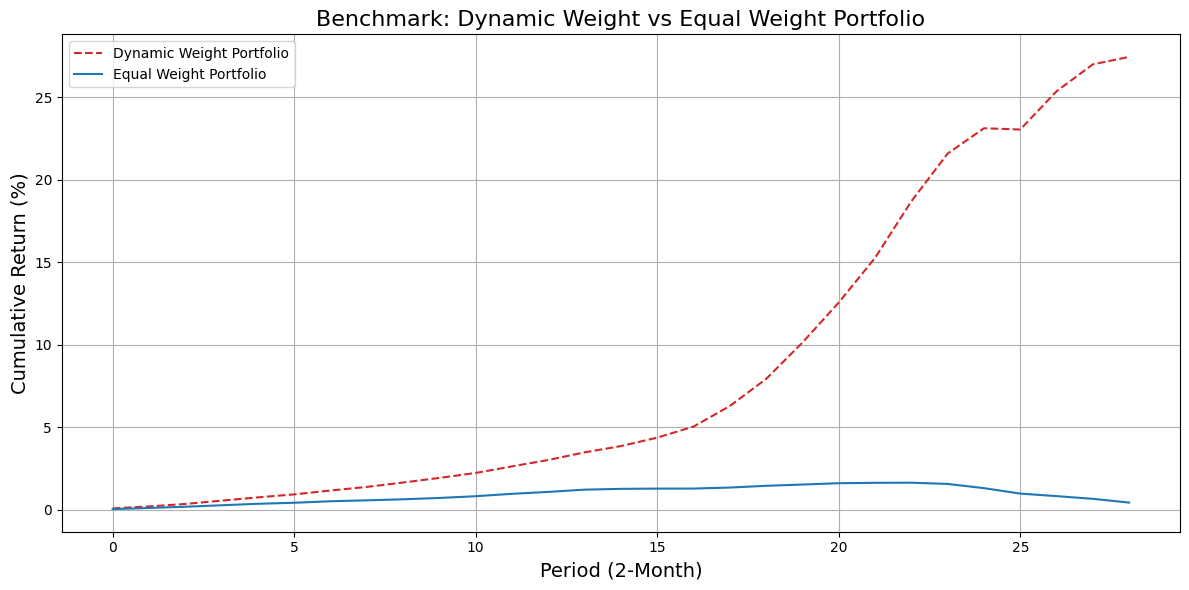

In [41]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Load the Excel file with the stock data and returns
file_path = 'C:/Users/PINYKEWD/anaconda3/Machine Learning and FinTech Homework/Project/stock_prices_with_returns.xlsx'

# Dictionary to store dataframes for each stock
stocks_data = {}

# Read each sheet from the Excel file into a dictionary
excel_data = pd.ExcelFile(file_path)
for sheet_name in excel_data.sheet_names:
    stocks_data[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)

# Extract the 2-Month Returns for XOM, PFE, and MSFT
xom_returns = stocks_data['XOM']['2-Month Returns'].dropna()
pfe_returns = stocks_data['PFE']['2-Month Returns'].dropna()
msft_returns = stocks_data['MSFT']['2-Month Returns'].dropna()

# Ensure the data is aligned to 60 months (5 years)
xom_returns = xom_returns[:60]
pfe_returns = pfe_returns[:60]
msft_returns = msft_returns[:60]

# Define the combined return calculation based on the predictive equation
def combined_return(weights, xom_returns, pfe_returns, msft_returns, t):
    alpha_xom, alpha_pfe, alpha_msft = weights
    
    # Using the combined predictive equation
    y_t_xom = alpha_xom * (0.033935 + 0.9739 * xom_returns[t-1] if t > 0 else 0)
    y_t_pfe = alpha_pfe * (0.003656 + 0.9762 * pfe_returns[t-1] if t > 0 else 0)
    y_t_msft = alpha_msft * (0.039883 + 0.9526 * msft_returns[t-1] if t > 0 else 0)
    
    # Total return for the portfolio at time t
    return -(y_t_xom + y_t_pfe + y_t_msft)  # We negate it for minimization

# Constraints: sum of weights should be equal to 1
def weight_constraint(weights):
    return np.sum(weights) - 1

# Initial guess for the weights (equally distributed among the stocks)
initial_weights = [1/3, 1/3, 1/3]

# Set the bounds for each weight to be between 0 and 1
bounds = [(0, 1), (0, 1), (0, 1)]

# Store the optimal weights for each 2-month period
optimal_weights_over_time = []

# Loop through the time periods and optimize weights every 2 months (total of 30 times over 5 years)
for t in range(1, len(xom_returns), 2):  # Start from time step 1 (second period), re-weight every 2 months
    # Limit the data to the period up to the current point t (inclusive)
    if t + 2 <= len(xom_returns):  # Avoid going out of bounds
        xom_subset = xom_returns[:t+2]
        pfe_subset = pfe_returns[:t+2]
        msft_subset = msft_returns[:t+2]
        
        # Optimize the weights for the current time period
        result = minimize(
            combined_return, 
            initial_weights, 
            args=(xom_subset, pfe_subset, msft_subset, t),
            constraints={'type': 'eq', 'fun': weight_constraint}, 
            bounds=bounds,
            method='SLSQP'
        )
        
        # Get the optimal weights for this period
        optimal_weights = result.x
        optimal_weights_over_time.append(optimal_weights)

# Convert the list of optimal weights to a DataFrame for easier visualization
optimal_weights_df = pd.DataFrame(optimal_weights_over_time, columns=['XOM Weight', 'PFE Weight', 'MSFT Weight'])

# Now, calculate the total return by applying the weights over the 30 periods
total_return_dynamic = 1  # Starting with an initial investment of 1 (100%)
total_return_equal = 1  # Equal-weighted strategy

# Store the returns for plotting
portfolio_returns_dynamic = []
portfolio_returns_equal = []

# Iterate through the periods and calculate the weighted returns
for i in range(len(optimal_weights_df)):
    weight_XOM = optimal_weights_df['XOM Weight'][i]
    weight_PFE = optimal_weights_df['PFE Weight'][i]
    weight_MSFT = optimal_weights_df['MSFT Weight'][i]
    
    return_XOM = xom_returns[i * 2]  # Returns are every 2 months
    return_PFE = pfe_returns[i * 2]  # Returns are every 2 months
    return_MSFT = msft_returns[i * 2]  # Returns are every 2 months
    
    # Calculate the weighted return for the dynamic strategy
    period_return_dynamic = (weight_XOM * return_XOM) + (weight_PFE * return_PFE) + (weight_MSFT * return_MSFT)
    
    # Update the total return for dynamic weight strategy
    total_return_dynamic *= (1 + period_return_dynamic)  # Compounding return
    portfolio_returns_dynamic.append(total_return_dynamic - 1)  # Store cumulative return
    
    # For equal-weighted strategy, calculate the average return of the 3 stocks
    period_return_equal = (return_XOM + return_PFE + return_MSFT) / 3  # Equal weights for each stock
    
    # Update the total return for equal-weighted strategy
    total_return_equal *= (1 + period_return_equal)  # Compounding return
    portfolio_returns_equal.append(total_return_equal - 1)  # Store cumulative return

# Final total return over 5 years for both strategies
total_return_dynamic -= 1  # Subtract 1 to get the actual return (as a percentage)
total_return_dynamic *= 100  # Convert to percentage

total_return_equal -= 1  # Subtract 1 to get the actual return (as a percentage)
total_return_equal *= 100  # Convert to percentage

# Calculate annualized returns
annual_return_dynamic = (1 + total_return_dynamic / 100) ** (1 / 5) - 1
annual_return_equal = (1 + total_return_equal / 100) ** (1 / 5) - 1

# Convert to percentage
annual_return_dynamic *= 100
annual_return_equal *= 100

print(f"Total Return over 5 years (Dynamic Weight): {total_return_dynamic:.2f}%")
print(f"Total Return over 5 years (Equal Weight): {total_return_equal:.2f}%")
print(f"Annual Return (Dynamic Weight): {annual_return_dynamic:.2f}%")
print(f"Annual Return (Equal Weight): {annual_return_equal:.2f}%")

# Plot the returns for both strategies
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative returns for both strategies
ax.plot(optimal_weights_df.index, portfolio_returns_dynamic, label='Dynamic Weight Portfolio', color='tab:red', linestyle='--')
ax.plot(optimal_weights_df.index, portfolio_returns_equal, label='Equal Weight Portfolio', color='tab:blue')

ax.set_xlabel('Period (2-Month)', fontsize=14)
ax.set_ylabel('Cumulative Return (%)', fontsize=14)
ax.set_title('Benchmark: Dynamic Weight vs Equal Weight Portfolio', fontsize=16)

ax.legend(loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()


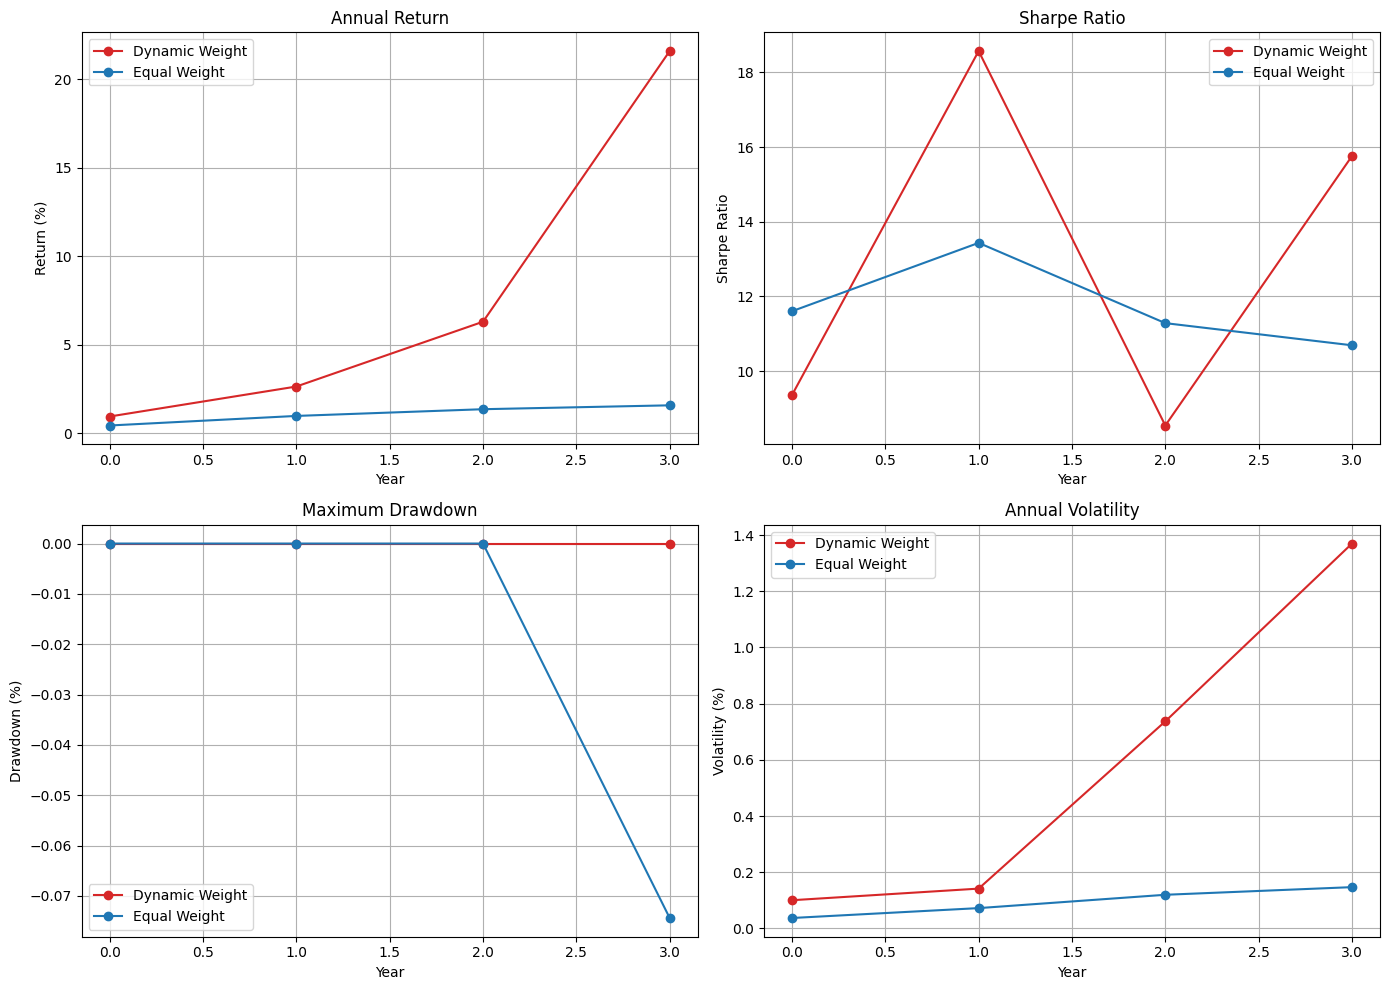

Dynamic Weight Strategy Metrics:
    Annual Return  Sharpe Ratio  Maximum Drawdown  Annual Volatility
0       0.939964      9.355158               0.0           0.100476
1       2.633952     18.574183               0.0           0.141807
2       6.294631      8.540798               0.0           0.737007
3      21.587785     15.761734               0.0           1.369633

Equal Weight Strategy Metrics:
    Annual Return  Sharpe Ratio  Maximum Drawdown  Annual Volatility
0       0.431926     11.602468          0.000000           0.037227
1       0.972825     13.434325          0.000000           0.072413
2       1.352385     11.283585          0.000000           0.119854
3       1.571821     10.689952         -0.074374           0.147037


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming cumulative returns are calculated as portfolio_returns_dynamic and portfolio_returns_equal

# Define a function to calculate annual metrics
def calculate_metrics(cumulative_returns, periods_per_year=6):
    # Convert cumulative returns to period returns
    period_returns = np.diff(cumulative_returns, prepend=0)
    annual_returns = []

    # Calculate metrics year by year
    for year in range(len(cumulative_returns) // periods_per_year):
        start_idx = year * periods_per_year
        end_idx = start_idx + periods_per_year
        
        yearly_returns = period_returns[start_idx:end_idx]
        cumulative_year_return = cumulative_returns[end_idx - 1]  # Last value of the year
        
        # Annual return
        annual_return = cumulative_year_return
        
        # Annual volatility
        annual_volatility = np.std(yearly_returns) * np.sqrt(periods_per_year)
        
        # Sharpe ratio (assuming risk-free rate = 0)
        sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else np.nan
        
        # Maximum drawdown
        cumulative_year = np.cumprod(1 + yearly_returns)
        peak = np.maximum.accumulate(cumulative_year)
        drawdown = (cumulative_year - peak) / peak
        max_drawdown = drawdown.min()
        
        annual_returns.append({
            'Annual Return': annual_return,
            'Sharpe Ratio': sharpe_ratio,
            'Maximum Drawdown': max_drawdown,
            'Annual Volatility': annual_volatility
        })

    return pd.DataFrame(annual_returns)

# Calculate metrics for both strategies
dynamic_metrics = calculate_metrics(portfolio_returns_dynamic)
equal_metrics = calculate_metrics(portfolio_returns_equal)

# Visualize the comparison
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Annual Return
axs[0, 0].plot(dynamic_metrics['Annual Return'], label='Dynamic Weight', marker='o', color='tab:red')
axs[0, 0].plot(equal_metrics['Annual Return'], label='Equal Weight', marker='o', color='tab:blue')
axs[0, 0].set_title('Annual Return')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Return (%)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Sharpe Ratio
axs[0, 1].plot(dynamic_metrics['Sharpe Ratio'], label='Dynamic Weight', marker='o', color='tab:red')
axs[0, 1].plot(equal_metrics['Sharpe Ratio'], label='Equal Weight', marker='o', color='tab:blue')
axs[0, 1].set_title('Sharpe Ratio')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Sharpe Ratio')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Maximum Drawdown
axs[1, 0].plot(dynamic_metrics['Maximum Drawdown'], label='Dynamic Weight', marker='o', color='tab:red')
axs[1, 0].plot(equal_metrics['Maximum Drawdown'], label='Equal Weight', marker='o', color='tab:blue')
axs[1, 0].set_title('Maximum Drawdown')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Drawdown (%)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Annual Volatility
axs[1, 1].plot(dynamic_metrics['Annual Volatility'], label='Dynamic Weight', marker='o', color='tab:red')
axs[1, 1].plot(equal_metrics['Annual Volatility'], label='Equal Weight', marker='o', color='tab:blue')
axs[1, 1].set_title('Annual Volatility')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Volatility (%)')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Print the metrics for comparison
print("Dynamic Weight Strategy Metrics:\n", dynamic_metrics)
print("\nEqual Weight Strategy Metrics:\n", equal_metrics)
